In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
path = r'D:\photos\robomaster\4.png'
img = cv2.imread(path, 1)
img = cv2.resize(img,(640,480))
gray_img = cv2.imread(path ,0)

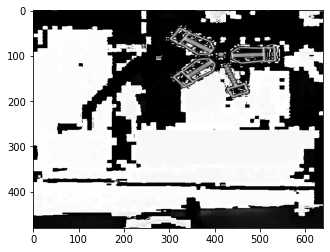

In [13]:
b, g, r = cv2.split(img)
red_img = r - b #颜色通道相减，去除其他分量
plt.imshow(red_img, cmap='gray')

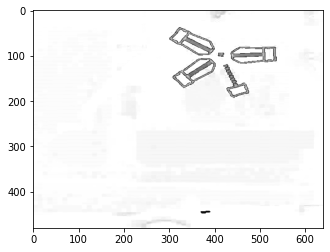

In [14]:
width, height = red_img.shape
for x in range(width):
    for y in range(height):
        if red_img[x, y] < 50:
            red_img[x, y] = 255 #消除overflow的影响
plt.imshow(red_img, cmap='gray')

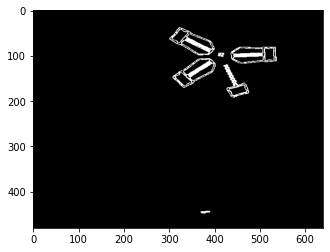

In [15]:
width, height = red_img.shape
for x in range(width):
    for y in range(height):
        if red_img[x, y] >180:
            red_img[x, y] = 0
        else:
            red_img[x, y] = 255
plt.imshow(red_img, cmap='gray')
#黑白反转

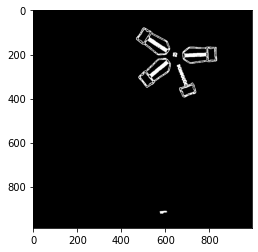

In [157]:
# ret, image = cv2.threshold(red_img, 100, 255, cv2.THRESH_BINARY)
# plt.imshow(image, cmap='gray')

6


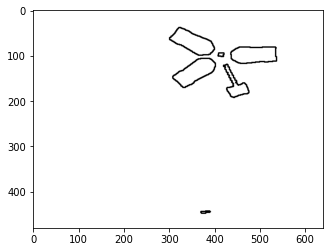

In [18]:
image = red_img
contours,hierarchy = cv2.findContours(image, 
                            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
white_canvas = np.ones([image.shape[0], image.shape[1], 3], 
                       dtype=np.uint8)*255
cv2.drawContours(white_canvas, contours, -1, 0, 2)
print(len(contours))
plt.imshow(white_canvas)
#寻找外轮廓

In [19]:
minAreaRects = []
for contour in contours:
    minAreaRects.append(cv2.minAreaRect(contour)) #拟合最小外接矩形
minAreaRects[:2]

[((380.5, 444.5000305175781),
  (21.004291534423828, 4.888929843902588),
  -5.194429397583008),
 ((443.95001220703125, 153.34999084472656),
  (45.22056579589844, 75.8946533203125),
  -18.434947967529297)]

In [20]:
#cv2.boxPoints() #获取旋转矩形的顶点
rects = []
for rotateRect in minAreaRects:
    rects.append(cv2.boxPoints(rotateRect))
rects[:2]

[array([[370.2623 , 447.88525],
        [369.81967, 443.01642],
        [390.7377 , 441.1148 ],
        [391.18033, 445.98364]], dtype=float32),
 array([[434.5    , 196.49998],
        [410.5    , 124.49999],
        [453.40002, 110.2    ],
        [477.40002, 182.19998]], dtype=float32)]

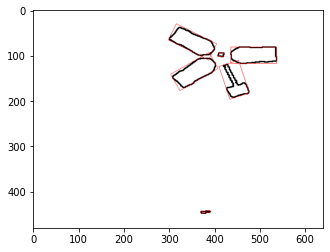

In [21]:
white_canvas2 = np.ones([image.shape[0], image.shape[1], 3],
                               dtype=np.uint8)*255
cv2.drawContours(white_canvas2, contours, -1, 0, 2)

for rect in rects:
    for j in range(4):
        cv2.line(white_canvas2, tuple(rect[j]), tuple(
            rect[(j + 1) % 4]), (255, 0, 0), 1)
plt.imshow(white_canvas2)
#画出轮廓和最小外接矩形

In [22]:
contourAreas = [cv2.contourArea(contour) for contour in contours]
rectAreas = []
for rect in minAreaRects:
    rectAreas.append(rect[1][0]*rect[1][1]) #宽*高
print(contourAreas)
print(rectAreas)
#计算面积

[69.0, 1404.0, 3213.0, 85.0, 3148.5, 3216.5]
[102.68850773267513, 3431.999164028093, 4018.115936686547, 104.0, 3636.0, 3969.4001932004467]


In [167]:
for ca, ra in zip(contourAreas, rectAreas):
    print(ca / ra) #面积的比例，通过这个来删选流动条
#比例大致在0.8左右，0.68那个是噪音（通过面积可以排除），0.43则是流动条

0.689610708888454
0.4304942434710359
0.8476292283776891
0.8209212585348009
0.8581964465303386
0.8494299460755478
